In [6]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import statsmodels.api as sm
from sklearn import metrics
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
import os
import math

In [2]:
A_dataset = pd.read_csv('datasetArtisticBackground.csv', sep=';')
S_dataset = pd.read_csv('datasetScientificBackground.csv', sep=';')

In [10]:
info = A_dataset.describe()
info

,timeDuration,nMovements,movementsDifficulty,robotSpeech,acrobaticMovements,movementsRepetition,movementsTransitionsDuration,humanMovements,balance,speed,...,handsMovement,legsMovement,feetMovement,EvaluationChoreographyStoryTelling,EvaluationChoreographyRhythm,EvaluationChoreographyMovementTechnique,EvaluationPublicInvolvement,EvaluationChoreographySpace,EvaluationChoreographyHumanCharacterization,EvaluationHumanReproducibility
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,66.667141,9.261735,1.907539,0.607397,0.371266,2.540541,1.698435,2.445235,2.291607,1.903272,...,1.827881,2.677098,1.452347,3.489331,3.526316,3.266003,3.231863,3.145092,3.005690,4.162162
std,12.625671,2.951131,0.609738,0.488677,0.483487,0.647804,0.728019,0.642335,0.829668,0.822946,...,0.528630,0.467918,0.498078,1.161877,1.138089,1.103773,1.175005,1.144291,1.211282,0.884750
min,53.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,61.000000,7.000000,2.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,4.000000
50%,62.000000,8.000000,2.000000,1.000000,0.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,1.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,70.000000,11.000000,2.000000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,106.000000,15.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


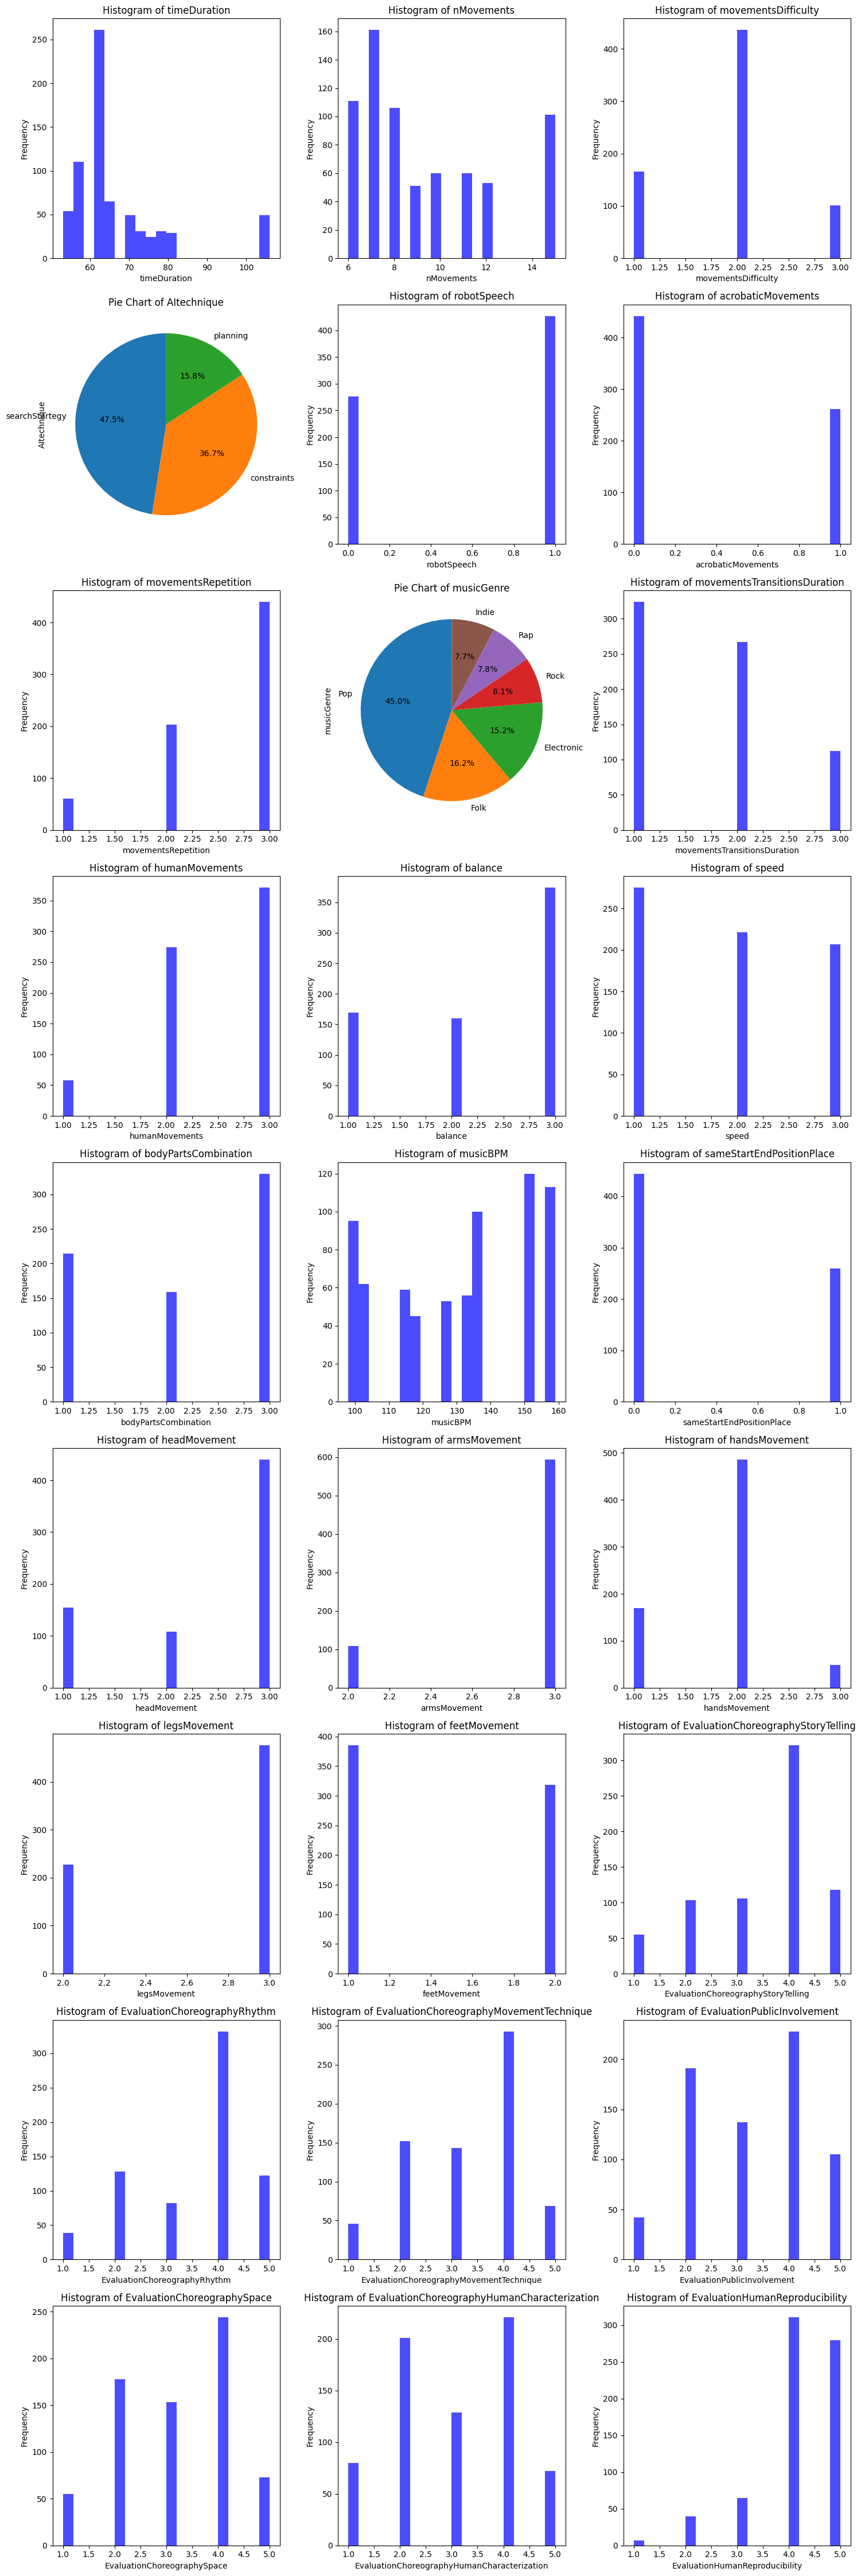

In [8]:
total_cols = len(A_dataset.columns)
cols_per_row = 3  # Modifica questo valore a seconda di quanti subplot vuoi in ogni riga
total_rows = math.ceil(total_cols / cols_per_row)

# Crea subplots
fig, axes = plt.subplots(total_rows, cols_per_row, figsize=(15, 5 * total_rows))

# Iterate attraverso tutte le colonne del DataFrame e crea i subplot
for i, column in enumerate(A_dataset.columns):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row

    # Crea un istogramma per le colonne numeriche
    if pd.api.types.is_numeric_dtype(A_dataset[column]):
        axes[row_idx, col_idx].hist(A_dataset[column], bins=20, color='blue', alpha=0.7)
        axes[row_idx, col_idx].set_title(f'Histogram of {column}')
        axes[row_idx, col_idx].set_xlabel(column)
        axes[row_idx, col_idx].set_ylabel('Frequency')
    
    # Crea un diagramma a barre per le colonne categoriche
    elif pd.api.types.is_categorical_dtype(A_dataset[column]):
        A_dataset[column].value_counts().plot(kind='bar', ax=axes[row_idx, col_idx], color='green', alpha=0.7)
        axes[row_idx, col_idx].set_title(f'Bar Chart of {column}')
        axes[row_idx, col_idx].set_xlabel(column)
        axes[row_idx, col_idx].set_ylabel('Count')
    
    # Crea un diagramma a torta per le colonne con valori unici
    elif len(A_dataset[column].unique()) <= 10:
        A_dataset[column].value_counts().plot(kind='pie', ax=axes[row_idx, col_idx], autopct='%1.1f%%', startangle=90, legend=False)
        axes[row_idx, col_idx].set_title(f'Pie Chart of {column}')
    
    # Puoi aggiungere altre condizioni o tipi di grafici a seconda del tipo di dati

# Aggiusta la disposizione dei subplots
plt.tight_layout()
plt.show()

In [17]:
print(A_dataset.dtypes)

timeDuration                                    int64
nMovements                                      int64
movementsDifficulty                             int64
AItechnique                                    object
robotSpeech                                     int64
acrobaticMovements                              int64
movementsRepetition                             int64
musicGenre                                     object
movementsTransitionsDuration                    int64
humanMovements                                  int64
balance                                         int64
speed                                           int64
bodyPartsCombination                            int64
musicBPM                                        int64
sameStartEndPositionPlace                       int64
headMovement                                    int64
armsMovement                                    int64
handsMovement                                   int64
legsMovement                